<a href="https://colab.research.google.com/github/munich-ml/MLPy2021/blob/main/35_batch_evaluate_fMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

## References
Resources used to create this notebook:
- [scikit-learn website](https://scikit-learn.org)
- [Matplotlib website](https://matplotlib.org/)
- [Wikipedia](https://en.wikipedia.org/wiki/Main_Page)
- Hands-on Machine Learning with Scikit-learn, Keras & TensorFlow, Aurelien Geron, [Book on Amazon](https://www.amazon.de/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_3?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Hands-on+Machine+Learning+with+Scikit-learn%2C+Keras+%26+TensorFlow%2C+Aurelien+Geron%2C&qid=1589875241&sr=8-3)
- Introduction to Machine Learning with Python, Andreas Mueller, [Book on Amazon](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)


## Setup

First, do the common imports.

Tensorflow must be 2.x, because there are major changes from 1.x

In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Setup matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

in_colab = 'google.colab' in sys.modules   # check if note is executed within Colab

# Forces tensorflow version (only in colab)
if in_colab:
    %tensorflow_version 2.x           

# Clone the repository if executed in Google Colab
if in_colab:  
    if "MLPy2021" in os.listdir():
        !git -C MLPy2021 pull
    else:
        !git clone https://github.com/munich-ml/MLPy2021/

# lib.helper_funcs.py. The import path depends on Colab or local execution 
if in_colab:
    from MLPy2021.lib.helper_funcs import pickle_in
else: 
    from lib.helper_funcs import pickle_in

Already up to date.


## Mount google drive

In [10]:

mount_dir = os.path.join(os.getcwd(), "drive")
mount_dir

'/content/drive'

In [11]:
from google.colab import drive
drive.mount(mount_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Batch Evaluation

In [12]:
save_dir = os.path.join(mount_dir, "My Drive", "Colab Notebooks", "models")
save_dir

'/content/drive/My Drive/Colab Notebooks/models'

In [13]:
from time import time
models = {}
for fn in os.listdir(save_dir):
    if fn.endswith(".h5"):
        model = keras.models.load_model(os.path.join(save_dir, fn))
        models[fn] = {"params": model.count_params(), "layers": len(model.layers)}
        # load the testset
        testset = fn.split(".")[0] + "_data.pkl"
        if testset in os.listdir(save_dir):
            pickle_in(os.path.join(save_dir, testset), locals())
            print("{}, X_test.shape: {}".format(fn, X_test.shape))
        
            t0 = time()
            models[fn]["accuracy"] = model.evaluate(X_test, y_test)[1]
            models[fn]["tEval [s]"] = time() - t0
        print("")

pickle_in: Updating scope with the following variables:
['X_test', 'y_test', 'class_names', 'X_valid', 'y_valid']
fMNIST_NN_v1_ageron.h5, X_test.shape: (10000, 28, 28)
313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8845

pickle_in: Updating scope with the following variables:
['X_test', 'y_test', 'X_valid', 'y_valid', 'class_names']
fMNIST_CNN_v6_cmasch.h5, X_test.shape: (10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9284

pickle_in: Updating scope with the following variables:
['X_test', 'y_test', 'X_valid', 'y_valid', 'class_names']
fMNIST_CNN_v4_ageron.h5, X_test.shape: (10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.9116



In [14]:
df = pd.DataFrame(models).transpose()
df

,params,layers,accuracy,tEval [s]
fMNIST_NN_v1_ageron.h5,266610.0,4.0,0.8845,0.718635
fMNIST_CNN_v6_cmasch.h5,939150.0,13.0,0.9284,1.089529
fMNIST_CNN_v4_ageron.h5,1413834.0,14.0,0.9116,1.412244


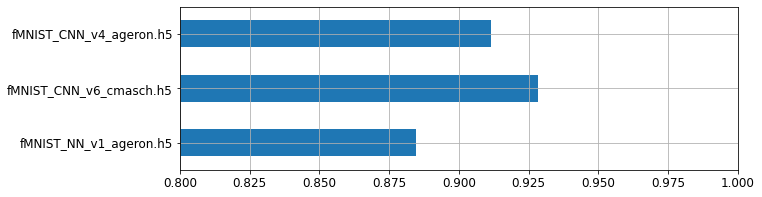

In [15]:
df["accuracy"].plot(kind="barh", figsize=(10,3), xlim=(0.8, 1), grid=True);

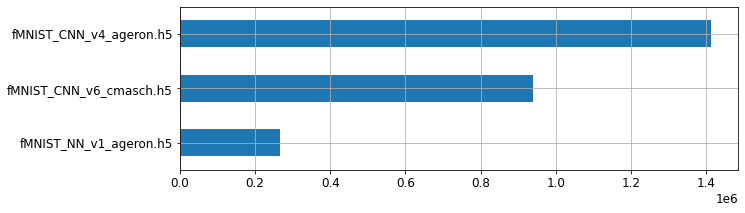

In [16]:
df["params"].plot(kind="barh", figsize=(10,3), grid=True);